This notebook is a material used in the plasticity lecture taught by [Youngung Jeong](mailto:yjeong@changwon.ac.kr) at Department of Materials Science and Engineering, [Changwon National University](http://www.changwon.ac.kr) in the spring of 2017.

## Learning objectives
 1. A few more operations based on NumPy array
 2. Understand least-square method and learn how to conduct it using NumPy.
 3. Understand how to process signals from measurement systems to physical values (Understand "calibration")

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Devices used to measure 'displacement' and 'force' recieves electrical signal from 'extensometer' and 'load-cell'

**displacement과 힘을 측정하는데 쓰이는 장비(도구)는 익스텐소미터와 로드셀이라 불린다.**

## How to read a datasheet?

In [2]:
data=np.loadtxt('RD4/Voltage.txt',skiprows=20)
print data.shape

(19987, 4)


The each of 4 columns in the **Voltage.txt** corresponds to cross-head displacement, force (load-cell), width extensometer, and axial (longitudinal) extensometer, respectively.

The variable data is an array with 2 'axes'. This can be understand as a collection of coordinates spread in 2-dimension space. You have, in total, (19987x4) points. It was shown that this array has a shape of (19987,4). You can 'swap' this shape to (4x19987) through an operation called 'transpose'. 

In [3]:
data=data.T ## data.T create the transposed array of data and returns.
print data.shape

(4, 19987)


If you want to read the data pertaining to first column and third row: data[0,2]

In [4]:
data[0,2] # pointing the element located in the first column and the third row 

-0.8122625

If you want to read all the elements pertaining to the first column

In [5]:
print data[0,:]

[-0.8119438 -0.8113064 -0.8122625 ...,  2.000035   1.999078   2.000991 ]


In [6]:
print data[0,:].shape

(19987,)


The above expression '**data[0,:]**' can be shortened to

In [7]:
print data[0]

[-0.8119438 -0.8113064 -0.8122625 ...,  2.000035   1.999078   2.000991 ]


There are more 'similar' features in [NumPy](http://www.numpy.org) array. Find more about them [here](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html)

# Plot first column against the second column

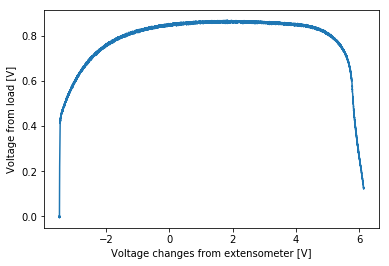

In [8]:
plot(data[3],data[1],'-')
# The first column is actually 
xlabel('Voltage changes from extensometer [V]')
ylabel('Voltage from load [V]')

- Q. Why the force drop towards the end of the curve?

## You'll be given a file named 'axial_ext.txt' for your own exercise

The **calib/axial_ext.txt** file is a datasheet that contains the lengths of gauge blocks vs. their corresponding voltage signals obtained by the extensometer subject to calibration.
Look at the below figure (from [wikipedia.org](http://www.wikipedia.org)), which shows a number of gauge blocks that are precisely manufactured with great care.
<img src="https://upload.wikimedia.org/wikipedia/commons/a/ac/GaugeBlockMetricSet.jpg">


Image of an 'extensometer' attached to a rod-shaped tensile specimen. This extensometer is a commercial product produced by [Epsilon Tech Corp](http://www.epsilontech.com).
<img src="http://www.epsilontech.com/wp-content/uploads/2016/04/tensile-testing-extensometer-Model-3542-creative-8.jpg">

In [9]:
# I have saved the file under a folder named 'calib'
# Warning: the command 'ls' is usually available on Unix/Linux systems. On windows, use 'dir'
!ls calib/

axial_ext.txt calib.txt     wid_ext.txt


In [10]:
## Warning: the command head is usually available at any Unix/Linux systems. 
## Not sure about Windows.
!head calib/axial_ext.txt 

Pcal    Pext
0       -3.1756
0.025   -2.918
0.05    -2.662
0.075   -2.405
0.100   -2.149
0.125   -1.892
0.150   -1.635
0.175   -1.378
0.200   -1.122


In [11]:
dat_axial_calib=np.loadtxt('calib/axial_ext.txt',skiprows=1)

In [12]:
print dat_axial_calib.shape

(15, 2)


- Transpose

In [13]:
dat_axial_calib = dat_axial_calib.T
print dat_axial_calib.shape

(2, 15)


- Extensometer reads displacement in terms of 'voltage' change. We want to convert the voltage signals to displacement values in the unit of milimeter.

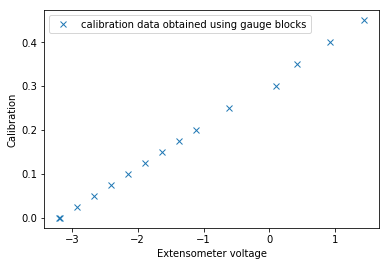

In [14]:
plot(dat_axial_calib[1],dat_axial_calib[0],'x',
     label='calibration data obtained using gauge blocks')

ylabel('Calibration')
xlabel('Extensometer voltage')
legend()

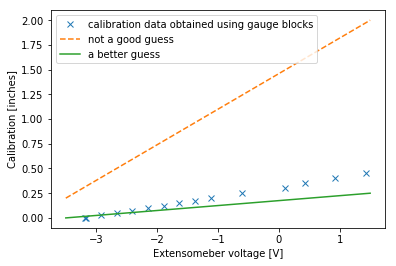

In [15]:
plot(dat_axial_calib[1],dat_axial_calib[0],'x',
     label='calibration data obtained using gauge blocks')

## manually determine the slope? (practice)
plot([-3.5,1.5],[0.2,2],'--',label='not a good guess')
plot([-3.5,1.5],[0,0.25],'-',label='a better guess')

ylabel('Calibration [inches]')
xlabel('Extensomeber voltage [V]')
legend()

## Is there a way to get this done using computer?
- The [least square method](https://en.wikipedia.org/wiki/Least_squares) (최소자승법) is a very "classical" and still very popular way to determine a 'straight'-line that goes through a set of 'scattered' data

Remeber that a straight line can be expressed as:
y = *a* x + *b*, where *a* and *b* are two unknown coefficients (i.e., slope of the line (기울기) and the intercept with y-axis (y 절편), respectively).

Basically, the least-square method is a way to determine the coefficients of the 'correct' line equation that exhibits a linear trend expected in a set of scattered points.

## How would you obtain the coefficients?

- We are re-writing the line equation as "y=Ap" where A becomes [[x 1]] p = [[m c]]. For more details of np.linalg.lstsq function, click on this [link](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html#numpy.linalg.lstsq). 

In [16]:
x=dat_axial_calib[1]
y=dat_axial_calib[0]

A = np.vstack([x, np.ones(len(x))]).T  ## stacking x array and an array consisting only with 1 (i.e., [[x 1]])
m, c = np.linalg.lstsq(A, y)[0]

print 'm:',m
print 'c:',c

m: 0.0966208926192
c: 0.307176757647


- You see, np.vstack and np.linslg.lstsq were used in the above. Find more about them using **help** feature

In [17]:
help(np.linalg.lstsq)

Help on function lstsq in module numpy.linalg.linalg:

lstsq(a, b, rcond=-1)
    Return the least-squares solution to a linear matrix equation.
    
    Solves the equation `a x = b` by computing a vector `x` that
    minimizes the Euclidean 2-norm `|| b - a x ||^2`.  The equation may
    be under-, well-, or over- determined (i.e., the number of
    linearly independent rows of `a` can be less than, equal to, or
    greater than its number of linearly independent columns).  If `a`
    is square and of full rank, then `x` (but for round-off error) is
    the "exact" solution of the equation.
    
    Parameters
    ----------
    a : (M, N) array_like
        "Coefficient" matrix.
    b : {(M,), (M, K)} array_like
        Ordinate or "dependent variable" values. If `b` is two-dimensional,
        the least-squares solution is calculated for each of the `K` columns
        of `b`.
    rcond : float, optional
        Cut-off ratio for small singular values of `a`.
        Singular values

In [18]:
help(np.vstack)

Help on function vstack in module numpy.core.shape_base:

vstack(tup)
    Stack arrays in sequence vertically (row wise).
    
    Take a sequence of arrays and stack them vertically to make a single
    array. Rebuild arrays divided by `vsplit`.
    
    Parameters
    ----------
    tup : sequence of ndarrays
        Tuple containing arrays to be stacked. The arrays must have the same
        shape along all but the first axis.
    
    Returns
    -------
    stacked : ndarray
        The array formed by stacking the given arrays.
    
    See Also
    --------
    stack : Join a sequence of arrays along a new axis.
    hstack : Stack arrays in sequence horizontally (column wise).
    dstack : Stack arrays in sequence depth wise (along third dimension).
    concatenate : Join a sequence of arrays along an existing axis.
    vsplit : Split array into a list of multiple sub-arrays vertically.
    
    Notes
    -----
    Equivalent to ``np.concatenate(tup, axis=0)`` if `tup` contains 

- Sanity check

m: 0.0966208926192
c: 0.307176757647


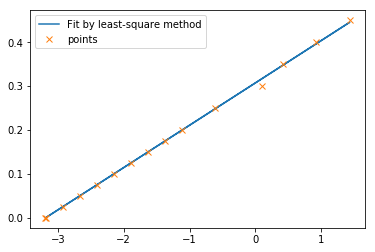

In [19]:
y_fit=x*m+c
plot(x,y_fit,label='Fit by least-square method')
plot(dat_axial_calib[1],dat_axial_calib[0],'x',label='points')
legend()

print 'm:',m
print 'c:',c

- We can now construct a function that can convert a 'voltage' signals to 'extension'

In [20]:
def convert_volt_to_axial_extension(voltage):
    """
    Function that converts 'voltage' to extension
    
    Argument
    --------
    voltage: value of voltage obtained from your axial extensometer
    
    Return
    ------
    voltage * m + c, 
        where m and c are coefficients of a straight-line that describes
        the linear relationship between the voltage signal and 'acutal' extension.   
    """
    return voltage * m + c

In [21]:
convert_volt_to_axial_extension(1.)

0.40379765026601089

- The 'string' block right starting in the following line of the function can be used as 'documentation' saved as an attribute '__doc__'. You can put instructions and read it later. See below cell:

In [22]:
print convert_volt_to_axial_extension.__doc__


    Function that converts 'voltage' to extension
    
    Argument
    --------
    voltage: value of voltage obtained from your axial extensometer
    
    Return
    ------
    voltage * m + c, 
        where m and c are coefficients of a straight-line that describes
        the linear relationship between the voltage signal and 'acutal' extension.   
    


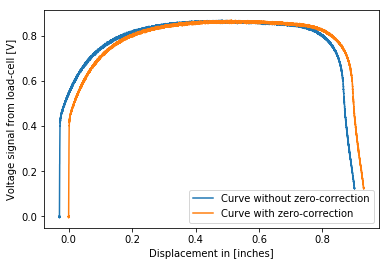

In [23]:
plot(data[3,:]*m+c,data[1,:],'-',label="Curve without zero-correction")
x_shifted=data[3,:]*m+c -(data[3,0]*m+c)
plot(x_shifted,data[1,:],'-',label="Curve with zero-correction")
legend()

xlabel('Displacement in [inches]')
ylabel('Voltage signal from load-cell [V]')

Remember the definition of 'engineering' strain

$\epsilon=\frac{l_1-l_0}{l_0}$
Let's convert the 'displacement' to 'length'
$l_1=l_0+d$

Therefore,
$\epsilon=\frac{d}{l_0}$. 

Usually, when conducting uniaxial tension test, we know the initial distance between the two arms of extensometer. Let's assume it is 20 [mm].

Also, you can find the converting factor between unit inch and unit milimeter system, i.e.,  **in = mm * 0.039370**.

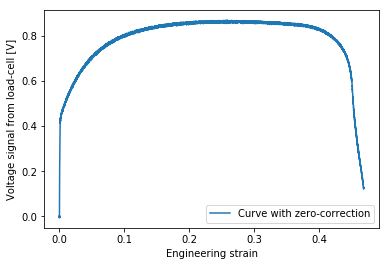

In [24]:
engi_strain=x_shifted/(50*0.03970)

plot(engi_strain,data[1,:],'-',label="Curve with zero-correction")
legend()
xlabel('Engineering strain')
ylabel('Voltage signal from load-cell [V]')

There is another extensometer that measures the displacement transverse to the longtidinal direction.

Likewise, the loadcell was calibrated, and the linear coefficient that converts the voltage [V] to force [N] was found to be 5,000 [N/V].

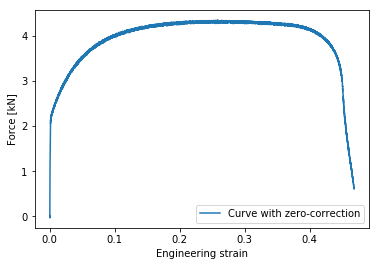

In [25]:
l0=50.
engi_strain=x_shifted/(l0*0.03970)

plot(engi_strain,data[1,:]*5000./1000.,'-',label="Curve with zero-correction")
legend()
xlabel('Engineering strain')
ylabel('Force [kN]')

- Calibration of width extension

In [26]:
calib_wid=np.loadtxt('calib/wid_ext.txt',skiprows=1).T

0.0340472173572 0.504297206193


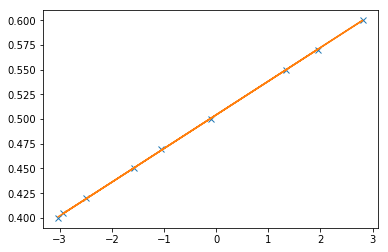

In [27]:
plot(calib_wid[1],calib_wid[0],'x')

## stacking x array and an array consisting only with 1 (i.e., [[x 1]])
A = np.vstack([calib_wid[1], np.ones(len(calib_wid[1]))]).T 
m, c = np.linalg.lstsq(A, calib_wid[0])[0]

y=m*calib_wid[1]+c
plot(calib_wid[1],y)
print m, c

m_wid, c_wid=m,c

In [28]:
def convert_volt_to_width_extension(volt):
    """
    Argument
    --------
    voltdata
    
    Return
    ------
    extension
    """
    return m_wid*volt+c_wid

## The principle of incompressibility

$l_i + w_i + t_i = l_f+w_f+t_f$, where l, w, and t refers to longitudinal, width, and thickness lengths, respectively; Also, the subscript $i$ and $f$ refer to the initial and final states. This principle is usually applied to 'metals' where the volume change during plastic deformation is 'negligibly' small.

### Example 1
A rectangular shaped **steel** specimen was subjected to a uniform deformation with its initial dimension ($l\times w \times t$) was $200 \times 10 \times 2\ [mm^3]$.
After the deformation, the dimension was measured again and we found its longitudinal and width lengths are 400 mm and 4.5 mm, respectively. We have learned that the metal volume is conserved. What will be the final thickness of the specimen?

**Answer**:

In [29]:
x=200*10*2/(400*4.5)

### Example 2

You were asked to test an aluminum specimen with the dimension of $250 \times 10 \times 1 [mm^3]$. You have analyzed the data from the longitudinal strain and found that it went through 0.12 **true** strain. Also, you found that the specimen went through an ** engineering ** strain of -0.04 along the width direction. What would be the thickness strain that the deformed specimen went through?

**Answer**:

- From the first observation, we have $ln(l_f)-ln(250)=0.12$

In [30]:
# That gives 
x=0.12 + np.log(250.)
l_f=np.exp(x)
print 'l_f:',l_f

l_f: 281.874212895


- The second observation is along the width direction
$\frac{(w-10)}{10} = -0.04$

In [31]:
w_f = -0.4+10
print 'w_f:',w_f

w_f: 9.6


- According to the incompressibility principle

In [32]:
t_f = 250.*10*1 / l_f / w_f

In [33]:
# The true thickness strain:
np.log(t_f)-np.log(2.)

-0.77232518603968969

- Incompressiblity

In [34]:
l_f*w_f*t_f

2500.0

In [35]:
250*10*1

2500

- Sanity check (see if the summation of all true strain is 'zero')

In [36]:
el=np.log(l_f)-np.log(250.)
ew=np.log(w_f)-np.log(10.)
et=np.log(t_f)-np.log(1.)
print el+ew+et

4.16333634234e-16


# True strain
$\varepsilon = \ln(l)-\ln(l_0)=\ln(\frac{l}{l_0})=\ln(\frac{l-l_0}{l_0}+1)=\ln(\epsilon^\mathrm{engi}+1)$

In [37]:
true_strain=np.log(engi_strain+1.)

# Engineering and true stresses

Before the test, the dimesion of the "specimen" was measured. It is noted here that the initial thickness and width of the specimen are 1.2 [mm] and 12.638 [mm], respectively.

The engineering stress is defined as 

$\sigma^\mathrm{engineering}=F/A_0$ 

where $F$ and $A_0$ are the applied force and the initial cross-section area.

In [38]:
sigma_engi = data[1,:]*5 / (1.2 *(10**-3) * 12.638 * (10**-3)) ## [kN/m^3]

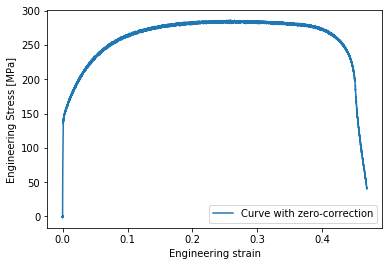

In [39]:
plot(engi_strain,sigma_engi/10**3,'-',label="Curve with zero-correction")
legend()
xlabel('Engineering strain')
ylabel('Engineering Stress [MPa]')

The true stress is defined as 

$\sigma^\mathrm{true}=\frac{F}{A}.$ 

Note that the 'area' is changing as the specimen is stretched.

### Question
How can we estimate the area that is 'changing' as we deform?

### Answer
We make use of the incompressibility principle.

- Observation 1.

$A = t \cdot w$. 

- Observation 2.

According to the incompressibility, $t \cdot w \cdot l=t_0 \cdot w_0 \cdot l_0$, which leads to 

- Observation 3.

$A \cdot l = A_0 \cdot l_0$

Therefore,

$\sigma^\mathrm{true}=\frac{F}{A}=\frac{F}{A_0}\frac{l}{l_0}$.

By the way, we know $\epsilon^\mathrm{longitudinal}=\frac{l-l_0}{l_0}=\frac{l}{l_0}-1$. Using this we have:

$\frac{l}{l_0}=\epsilon+1$. 

This gives 

$\sigma^\mathrm{true}=\sigma^\mathrm{engi}(\epsilon+1)$.

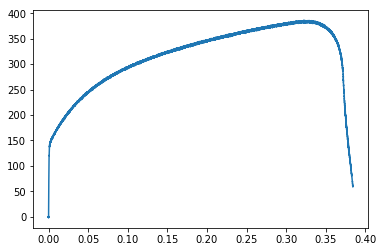

In [40]:
sigma_true=sigma_engi*(engi_strain+1.)
plot(true_strain,sigma_true/10**3)

### Question
Is the above plot correct?

### Answer
No. The stress after the onset of necking should not be included in the true-stress.
Therefore, the data after the onset of necking should be 'trimmed'. The onset of necking may be found at the point of maximum force.

# Comparison between the two stress-strain curves.

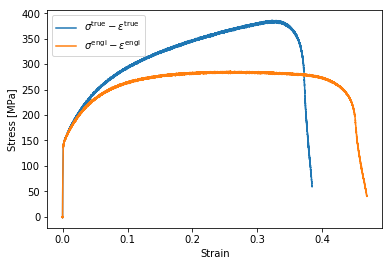

In [41]:
plot(true_strain,sigma_true/10**3,label=r'$\sigma^\mathrm{true}-\epsilon^\mathrm{true}$')
plot(engi_strain,sigma_engi/10**3,label=r'$\sigma^\mathrm{engi}-\epsilon^\mathrm{engi}$')
xlabel('Strain')
ylabel('Stress [MPa]')
legend()

# R-value 
R-value is defined as the ratio of width strain to thickness strain (i.e., $R=\frac{\epsilon^{width}}{\epsilon^{thickness}})$. It is a material property, which can be obtained from a uniaxial tension test. R value may quantify the anisotropy of sheet metal. Usually, the uniaxial tension test is conducted using two different extensometers - one longitudinal another transverse.

In [42]:
## the two different functions that convert voltages to respective extensions.
true_strain ## 
wid = convert_volt_to_width_extension(data[2,:])
wid_extension = wid-wid[0] ## in [inches]

In [43]:
wid_extension

array([  0.00000000e+00,  -1.08542529e-05,  -3.25559492e-05, ...,
        -9.02716004e-02,  -9.02933226e-02,  -9.02933226e-02])

In [44]:
wid_strain = np.log(wid_extension/12.638/0.03970+1.)

In [45]:
wid_strain

array([  0.00000000e+00,  -2.16339477e-05,  -6.48896745e-05, ...,
        -1.98354818e-01,  -1.98407613e-01,  -1.98407613e-01])

In [46]:
thick_strain = -(true_strain + wid_strain)

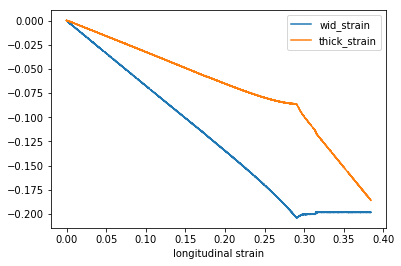

In [47]:
plot(true_strain, wid_strain,label='wid_strain')
plot(true_strain, thick_strain,label='thick_strain')
xlabel('longitudinal strain')
legend()

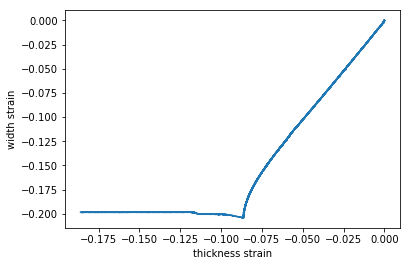

In [48]:
plot(thick_strain,wid_strain)
xlabel('thickness strain')
ylabel('width strain')

## Assignment

Given the data file, uploaded in [here](), plot the correct true-stress vs. true-strain curve. Remember that the true-stress vs. true-strain curve should be 'trimmed'. The post-necking data should not be used.